In [2]:
import constants as co
from analyzers import analyze_classifier, analyze_regressor, get_model_predictions
from auxiliary import loggers
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from pathlib import Path
import sys

import pandas as pd
pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_columns", 200)
import numpy as np
import os

import pickle
import json
import re

from rdkit import Chem
from rdkit.Chem import Draw

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)
random_seed = 42

%config Completer.use_jedi = False

l = loggers.get_logger(logger_name="logger")

# METHOD_PREFIX = "rf"
# RESULT_FILE_REGRESSOR = "result_regressor_rf.csv"
# RESULT_FILE_CLASSIFIER = "result_classifier_rf.csv"

In [3]:
l.info(os.environ['CONDA_DEFAULT_ENV'])

2023-01-29 16:20:25,432 - logger - INFO - rorgammaqsar


In [4]:
external_data = pd.read_parquet(co.DATA_DIR_CANDIDATES/"search_space_ror_gamma_all_active_found_species_filtered_.parquet")
external_smiles = external_data["smiles_from_target_id"]
external_data.shape

(1673, 6)

In [5]:
external_data.head()

,query_id,target_id,score,file,smiles_from_target_id,query_id_chembl
178,2423,14273019,0.750000,JKBB.fpb,COc1cc(NC(=O)c2cc([N+](=O)[O-])ccc2Cl)ccc1NC(=O)c1ccccc1Cl,CHEMBL4784120
184,664,410046164,0.733333,JKAD.fpb,CCS(=O)(=O)c1ccc(CC(=O)Nc2ccccc2-c2ccc(-c3ccccc3)cc2)cc1,CHEMBL3609389
863,357,519399935,0.736842,JKAD.fpb,COCCc1ccc(Oc2ccc(NS(=O)(=O)c3ccc4c5c(cccc35)C(=O)N4)cc2)cc1,CHEMBL3234246
1132,299,476865727,0.719298,JKAD.fpb,CCS(=O)(=O)c1ccc(CC(=O)Nc2nc(Cc3ccccc3)c(-c3ccccc3)s2)cc1,CHEMBL3105804
1207,270,626626267,0.750000,JKAD.fpb,CC(=O)Nc1ccc(CC(=O)Nc2nc(-c3ccccc3)c(C(=O)c3ccccc3)s2)cc1,CHEMBL3105674


In [6]:
X_val, y_train_val, y_train_val_pred, X_train, y_train, y_train_pred, X_ext, y_reg = get_model_predictions(co.TRAINING_CONF_DIR/"median_100"/"svm_regression_Morgan_1024_pca_128_QED.json", smiles_codes_ext=external_smiles)
y_reg.name = "pred_reg"
y_reg.head()

2023-01-29 16:20:27,607 - logger - INFO - Scaler constructor...
2023-01-29 16:20:27,607 - logger - INFO - PCA constructor...
2023-01-29 16:20:27,616 - logger - INFO - Scaler constructor...
2023-01-29 16:20:27,617 - logger - INFO - PCA constructor...
2023-01-29 16:20:27,618 - logger - INFO - Optimal hyperparameters:, {'C': 2.4825430099517085, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'epsilon': 0.1311194468831029, 'shrinking': False, 'tol': 0.001, 'verbose': False}
2023-01-29 16:20:27,618 - logger - INFO - CreateFPS fit...
2023-01-29 16:20:27,619 - logger - INFO - CreateFPS transform...
100%|██████████| 2005/2005 [00:04<00:00, 414.10it/s]
2023-01-29 16:20:35,997 - logger - INFO - Scaler fit...
2023-01-29 16:20:36,004 - logger - INFO - Scaler transform...
2023-01-29 16:20:36,014 - logger - INFO - Scaler fit...
2023-01-29 16:20:36,223 - logger - INFO - CreateFPS fit...
2023-01-29 16:20:36,224 - logger - INFO - CreateFPS transform...
1

178     5.835433
184     7.276806
863     4.967100
1132    6.489349
1207    5.612848
Name: pred_reg, dtype: float64

Text(0.5, 1.0, 'Distribution of pIC50 values in the training set')

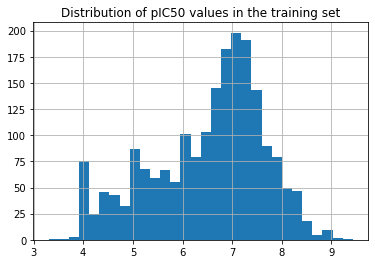

In [7]:
y_train.hist(bins=30)
plt.title("Distribution of pIC50 values in the training set")

Text(0.5, 1.0, 'Distribution of pIC50 values in the external')

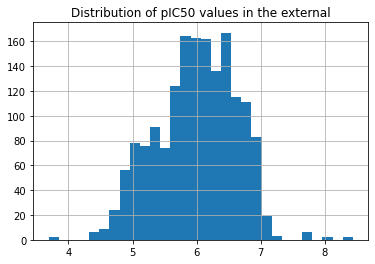

In [8]:
y_reg.hist(bins=30)
plt.title("Distribution of pIC50 values in the external")

In [9]:
X_val, y_train_val, y_train_val_pred, X_train, y_train, y_train_pred, X_ext, y_cla = get_model_predictions(co.TRAINING_CONF_DIR/"median_100"/"xgboost_classification_Morgan_1024.json", smiles_codes_ext=external_smiles)
y_cla.name = "pred_cla"
y_cla.head()

2023-01-29 16:20:57,612 - logger - INFO - Optimal hyperparameters:, {'n_estimators': 207, 'max_depth': 11, 'min_child_weight': 4.0, 'eta': 0.0981512863074986, 'subsample': 0.8489134735056307, 'colsample_bytree': 0.9991597152608629, 'gamma': 0.09722750628904986, 'reg_alpha': 0.43598619904511926, 'reg_lambda': 0.9494079510404132, 'objective': 'reg:logistic'}
2023-01-29 16:20:57,613 - logger - INFO - CreateFPS fit...
2023-01-29 16:20:57,613 - logger - INFO - CreateFPS fit...
2023-01-29 16:20:57,614 - logger - INFO - CreateFPS transform...
2023-01-29 16:20:58,098 - logger - INFO - CreateFPS fit...
2023-01-29 16:20:58,098 - logger - INFO - CreateFPS transform...
2023-01-29 16:20:59,219 - logger - INFO - CreateFPS fit...
2023-01-29 16:20:59,220 - logger - INFO - CreateFPS transform...


178     0.682276
184     0.764044
863     0.080937
1132    0.429891
1207    0.284917
Name: pred_cla, dtype: float32

Text(0.5, 1.0, 'Distribution of binarized values in the training set')

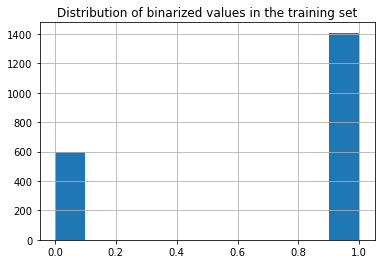

In [10]:
y_train.astype(int).hist()
plt.title("Distribution of binarized values in the training set")

Text(0.5, 1.0, 'Distribution of binarized values in the external set')

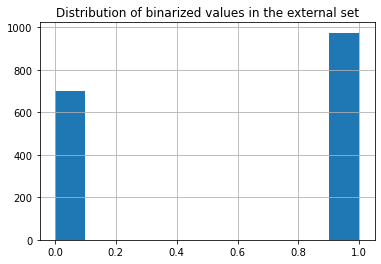

In [11]:
(y_cla > 0.5).astype(int).hist()
plt.title("Distribution of binarized values in the external set")

In [12]:
external_data_with_preds = pd.concat([external_data, y_cla, y_reg], axis=1)
external_data_with_preds["pred_reg_IC50"] = external_data_with_preds["pred_reg"].apply(lambda x: np.power(10, -x) * 10e9)
external_data_with_preds = external_data_with_preds.sort_values("pred_cla", ascending=False)

In [13]:
external_data_with_preds.sort_values("pred_reg_IC50")

,query_id,target_id,score,file,smiles_from_target_id,query_id_chembl,pred_cla,pred_reg,pred_reg_IC50
1187,435,205981195,0.753846,JKAA.fpb,Cc1ccc([C@H](NC(=O)Cc2ccc(OCc3c(C)noc3C)cc2)c2ccccc2)c(C)c1,CHEMBL3314025,0.913598,8.435542,3.668245e+01
1188,435,205981221,0.753846,JKAA.fpb,Cc1ccc([C@@H](NC(=O)Cc2ccc(OCc3c(C)noc3C)cc2)c2ccccc2)c(C)c1,CHEMBL3314025,0.913598,8.435542,3.668245e+01
1185,435,9112563,0.774194,JKAA.fpb,Cc1noc(C)c1COc1ccc(CC(=O)N[C@H](c2ccccc2)c2ccc(Cl)cc2)cc1,CHEMBL3314025,0.891456,8.024062,9.461017e+01
1194,435,9112562,0.774194,JKAA.fpb,Cc1noc(C)c1COc1ccc(CC(=O)N[C@@H](c2ccccc2)c2ccc(Cl)cc2)cc1,CHEMBL3314025,0.891456,8.024062,9.461017e+01
2074,435,501446155,0.712121,JKAD.fpb,Cc1noc(C)c1COc1ccc(CC(=O)N[C@@H](c2ccccc2)c2cccc(Cl)c2)cc1,CHEMBL3314025,0.898776,7.773108,1.686132e+02
...,...,...,...,...,...,...,...,...,...
449,362,79052,0.767857,EGAB.fpb,CSc1ccc(NCc2cccc(C(=O)N3CCCCC3)c2)nn1,CHEMBL3234252,0.150479,4.360135,4.363803e+05
484,352,956875,0.711864,FDAA.fpb,CCOc1ccc(CN2CCN(c3cc(N)nc(N)n3)C[C@H]2CCO)cc1,CHEMBL3234034,0.133887,4.346246,4.505615e+05
408,354,956875,0.724138,FDAA.fpb,CCOc1ccc(CN2CCN(c3cc(N)nc(N)n3)C[C@H]2CCO)cc1,CHEMBL3234241,0.133887,4.346246,4.505615e+05
285,365,816436,0.759259,GGAA.fpb,CCOc1ccc2nc(NC(=O)[C@@H](Cc3ccccc3)n3cnnn3)sc2c1,CHEMBL3234256,0.216532,3.848693,1.416796e+06


In [14]:
external_data_with_preds.to_csv(co.DATA_DIR_CANDIDATES/"search_space_ror_gamma_all_active_predictions_with_chembl.csv", index=False)

# Area of aplicability

In [15]:
X_val, y_train_val, y_train_val_pred, X_train, y_train, y_train_pred, X_ext, y_cla = get_model_predictions(co.TRAINING_CONF_DIR/"median_100"/"xgboost_classification_Morgan_1024.json", smiles_codes_ext=external_smiles)
y_cla.name = "pred_cla"
y_cla.head()

2023-01-29 16:21:13,373 - logger - INFO - Optimal hyperparameters:, {'n_estimators': 207, 'max_depth': 11, 'min_child_weight': 4.0, 'eta': 0.0981512863074986, 'subsample': 0.8489134735056307, 'colsample_bytree': 0.9991597152608629, 'gamma': 0.09722750628904986, 'reg_alpha': 0.43598619904511926, 'reg_lambda': 0.9494079510404132, 'objective': 'reg:logistic'}
2023-01-29 16:21:13,373 - logger - INFO - CreateFPS fit...
2023-01-29 16:21:13,374 - logger - INFO - CreateFPS fit...
2023-01-29 16:21:13,374 - logger - INFO - CreateFPS transform...
2023-01-29 16:21:13,519 - logger - INFO - CreateFPS fit...
2023-01-29 16:21:13,520 - logger - INFO - CreateFPS transform...
2023-01-29 16:21:14,633 - logger - INFO - CreateFPS fit...
2023-01-29 16:21:14,633 - logger - INFO - CreateFPS transform...


178     0.682276
184     0.764044
863     0.080937
1132    0.429891
1207    0.284917
Name: pred_cla, dtype: float32

In [16]:
n_start = 10000
idx = list(range(n_start, n_start+X_ext.shape[0]))
X_ext.index = idx
y_cla.index = idx
external_smiles.index = idx

In [17]:
X_ext

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,fp_10,fp_11,fp_12,fp_13,fp_14,fp_15,fp_16,fp_17,fp_18,fp_19,fp_20,fp_21,fp_22,fp_23,fp_24,fp_25,fp_26,fp_27,fp_28,fp_29,fp_30,fp_31,fp_32,fp_33,fp_34,fp_35,fp_36,fp_37,fp_38,fp_39,fp_40,fp_41,fp_42,fp_43,fp_44,fp_45,fp_46,fp_47,fp_48,fp_49,fp_50,fp_51,fp_52,fp_53,fp_54,fp_55,fp_56,fp_57,fp_58,fp_59,fp_60,fp_61,fp_62,fp_63,fp_64,fp_65,fp_66,fp_67,fp_68,fp_69,fp_70,fp_71,fp_72,fp_73,fp_74,fp_75,fp_76,fp_77,fp_78,fp_79,fp_80,fp_81,fp_82,fp_83,fp_84,fp_85,fp_86,fp_87,fp_88,fp_89,fp_90,fp_91,fp_92,fp_93,fp_94,fp_95,fp_96,fp_97,fp_98,fp_99,fp_100,fp_101,fp_102,fp_103,fp_104,fp_105,fp_106,fp_107,fp_108,fp_109,fp_110,fp_111,fp_112,fp_113,fp_114,fp_115,fp_116,fp_117,fp_118,fp_119,fp_120,fp_121,fp_122,fp_123,fp_124,fp_125,fp_126,fp_127,fp_128,fp_129,fp_130,fp_131,fp_132,fp_133,fp_134,fp_135,fp_136,fp_137,fp_138,fp_139,fp_140,fp_141,fp_142,fp_143,fp_144,fp_145,fp_146,fp_147,fp_148,fp_149,fp_150,fp_151,fp_152,fp_153,fp_154,fp_155,fp_156,fp_157,fp_158,fp_159,fp_160,fp_161,fp_162,fp_163,fp_164,fp_165,fp_166,fp_167,fp_168,fp_169,fp_170,fp_171,fp_172,fp_173,fp_174,fp_175,fp_176,fp_177,fp_178,fp_179,fp_180,fp_181,fp_182,fp_183,fp_184,fp_185,fp_186,fp_187,fp_188,fp_189,fp_190,fp_191,fp_192,fp_193,fp_194,fp_195,fp_196,fp_197,fp_198,fp_199,fp_200,fp_201,fp_202,fp_203,fp_204,fp_205,fp_206,fp_207,fp_208,fp_209,fp_210,fp_211,fp_212,fp_213,fp_214,fp_215,fp_216,fp_217,fp_218,fp_219,fp_220,fp_221,fp_222,fp_223,fp_224,fp_225,fp_226,fp_227,fp_228,fp_229,fp_230,fp_231,fp_232,fp_233,fp_234,fp_235,fp_236,fp_237,fp_238,fp_239,fp_240,fp_241,fp_242,fp_243,fp_244,fp_245,fp_246,fp_247,fp_248,fp_249,fp_250,fp_251,fp_252,fp_253,fp_254,fp_255,fp_256,fp_257,fp_258,fp_259,fp_260,fp_261,fp_262,fp_263,fp_264,fp_265,fp_266,fp_267,fp_268,fp_269,fp_270,fp_271,fp_272,fp_273,fp_274,fp_275,fp_276,fp_277,fp_278,fp_279,fp_280,fp_281,fp_282,fp_283,fp_284,fp_285,fp_286,fp_287,fp_288,fp_289,fp_290,fp_291,fp_292,fp_293,fp_294,fp_295,fp_296,fp_297,fp_298,fp_299,fp_300,fp_301,fp_302,fp_303,fp_304,fp_305,fp_306,fp_307,fp_308,fp_309,fp_310,fp_311,fp_312,fp_313,fp_314,fp_315,fp_316,fp_317,fp_318,fp_319,fp_320,fp_321,fp_322,fp_323,fp_324,fp_325,fp_326,fp_327,fp_328,fp_329,fp_330,fp_331,fp_332,fp_333,fp_334,fp_335,fp_336,fp_337,fp_338,fp_339,fp_340,fp_341,fp_342,fp_343,fp_344,fp_345,fp_346,fp_347,fp_348,fp_349,fp_350,fp_351,fp_352,fp_353,fp_354,fp_355,fp_356,fp_357,fp_358,fp_359,fp_360,fp_361,fp_362,fp_363,fp_364,fp_365,fp_366,fp_367,fp_368,fp_369,fp_370,fp_371,fp_372,fp_373,fp_374,fp_375,fp_376,fp_377,fp_378,fp_379,fp_380,fp_381,fp_382,fp_383,fp_384,fp_385,fp_386,fp_387,fp_388,fp_389,fp_390,fp_391,fp_392,fp_393,fp_394,fp_395,fp_396,fp_397,fp_398,fp_399,fp_400,fp_401,fp_402,fp_403,fp_404,fp_405,fp_406,fp_407,fp_408,fp_409,fp_410,fp_411,fp_412,fp_413,fp_414,fp_415,fp_416,fp_417,fp_418,fp_419,fp_420,fp_421,fp_422,fp_423,fp_424,fp_425,fp_426,fp_427,fp_428,fp_429,fp_430,fp_431,fp_432,fp_433,fp_434,fp_435,fp_436,fp_437,fp_438,fp_439,fp_440,fp_441,fp_442,fp_443,fp_444,fp_445,fp_446,fp_447,fp_448,fp_449,fp_450,fp_451,fp_452,fp_453,fp_454,fp_455,fp_456,fp_457,fp_458,fp_459,fp_460,fp_461,fp_462,fp_463,fp_464,fp_465,fp_466,fp_467,fp_468,fp_469,fp_470,fp_471,fp_472,fp_473,fp_474,fp_475,fp_476,fp_477,fp_478,fp_479,fp_480,fp_481,fp_482,fp_483,fp_484,fp_485,fp_486,fp_487,fp_488,fp_489,fp_490,fp_491,fp_492,fp_493,fp_494,fp_495,fp_496,fp_497,fp_498,fp_499,fp_500,fp_501,fp_502,fp_503,fp_504,fp_505,fp_506,fp_507,fp_508,fp_509,fp_510,fp_511,fp_512,fp_513,fp_514,fp_515,fp_516,fp_517,fp_518,fp_519,fp_520,fp_521,fp_522,fp_523,fp_524,fp_525,fp_526,fp_527,fp_528,fp_529,fp_530,fp_531,fp_532,fp_533,fp_534,fp_535,fp_536,fp_537,fp_538,fp_539,fp_540,fp_541,fp_542,fp_543,fp_544,fp_545,fp_546,fp_547,fp_548,fp_549,fp_550,fp_551,fp_552,fp_553,fp_554,fp_555,fp_556,fp_557,fp_558,fp_559,fp_560,fp_561,fp_562,fp_563,fp_564,fp_565,fp_566,fp_567,fp_568,fp_569,fp_570,fp_571,fp_572,fp_573,fp_574,fp_575,fp_576,fp_577,fp_578,fp_579,fp_580,fp_581,fp_582,fp_583,fp_584,fp_585,fp_586,

In [18]:
X1_tmp = pd.concat([X_train, pd.DataFrame(["train" for iii in range(X_train.shape[0])], index=X_train.index, columns=["set"])], axis=1) 
X2_tmp = pd.concat([X_ext, pd.DataFrame(["ext" for iii in range(X_ext.shape[0])], index=X_ext.index, columns=["set"])], axis=1)
X_combined = pd.concat([X1_tmp, X2_tmp])
X_combined

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,fp_10,fp_11,fp_12,fp_13,fp_14,fp_15,fp_16,fp_17,fp_18,fp_19,fp_20,fp_21,fp_22,fp_23,fp_24,fp_25,fp_26,fp_27,fp_28,fp_29,fp_30,fp_31,fp_32,fp_33,fp_34,fp_35,fp_36,fp_37,fp_38,fp_39,fp_40,fp_41,fp_42,fp_43,fp_44,fp_45,fp_46,fp_47,fp_48,fp_49,fp_50,fp_51,fp_52,fp_53,fp_54,fp_55,fp_56,fp_57,fp_58,fp_59,fp_60,fp_61,fp_62,fp_63,fp_64,fp_65,fp_66,fp_67,fp_68,fp_69,fp_70,fp_71,fp_72,fp_73,fp_74,fp_75,fp_76,fp_77,fp_78,fp_79,fp_80,fp_81,fp_82,fp_83,fp_84,fp_85,fp_86,fp_87,fp_88,fp_89,fp_90,fp_91,fp_92,fp_93,fp_94,fp_95,fp_96,fp_97,fp_98,fp_99,fp_100,fp_101,fp_102,fp_103,fp_104,fp_105,fp_106,fp_107,fp_108,fp_109,fp_110,fp_111,fp_112,fp_113,fp_114,fp_115,fp_116,fp_117,fp_118,fp_119,fp_120,fp_121,fp_122,fp_123,fp_124,fp_125,fp_126,fp_127,fp_128,fp_129,fp_130,fp_131,fp_132,fp_133,fp_134,fp_135,fp_136,fp_137,fp_138,fp_139,fp_140,fp_141,fp_142,fp_143,fp_144,fp_145,fp_146,fp_147,fp_148,fp_149,fp_150,fp_151,fp_152,fp_153,fp_154,fp_155,fp_156,fp_157,fp_158,fp_159,fp_160,fp_161,fp_162,fp_163,fp_164,fp_165,fp_166,fp_167,fp_168,fp_169,fp_170,fp_171,fp_172,fp_173,fp_174,fp_175,fp_176,fp_177,fp_178,fp_179,fp_180,fp_181,fp_182,fp_183,fp_184,fp_185,fp_186,fp_187,fp_188,fp_189,fp_190,fp_191,fp_192,fp_193,fp_194,fp_195,fp_196,fp_197,fp_198,fp_199,fp_200,fp_201,fp_202,fp_203,fp_204,fp_205,fp_206,fp_207,fp_208,fp_209,fp_210,fp_211,fp_212,fp_213,fp_214,fp_215,fp_216,fp_217,fp_218,fp_219,fp_220,fp_221,fp_222,fp_223,fp_224,fp_225,fp_226,fp_227,fp_228,fp_229,fp_230,fp_231,fp_232,fp_233,fp_234,fp_235,fp_236,fp_237,fp_238,fp_239,fp_240,fp_241,fp_242,fp_243,fp_244,fp_245,fp_246,fp_247,fp_248,fp_249,fp_250,fp_251,fp_252,fp_253,fp_254,fp_255,fp_256,fp_257,fp_258,fp_259,fp_260,fp_261,fp_262,fp_263,fp_264,fp_265,fp_266,fp_267,fp_268,fp_269,fp_270,fp_271,fp_272,fp_273,fp_274,fp_275,fp_276,fp_277,fp_278,fp_279,fp_280,fp_281,fp_282,fp_283,fp_284,fp_285,fp_286,fp_287,fp_288,fp_289,fp_290,fp_291,fp_292,fp_293,fp_294,fp_295,fp_296,fp_297,fp_298,fp_299,fp_300,fp_301,fp_302,fp_303,fp_304,fp_305,fp_306,fp_307,fp_308,fp_309,fp_310,fp_311,fp_312,fp_313,fp_314,fp_315,fp_316,fp_317,fp_318,fp_319,fp_320,fp_321,fp_322,fp_323,fp_324,fp_325,fp_326,fp_327,fp_328,fp_329,fp_330,fp_331,fp_332,fp_333,fp_334,fp_335,fp_336,fp_337,fp_338,fp_339,fp_340,fp_341,fp_342,fp_343,fp_344,fp_345,fp_346,fp_347,fp_348,fp_349,fp_350,fp_351,fp_352,fp_353,fp_354,fp_355,fp_356,fp_357,fp_358,fp_359,fp_360,fp_361,fp_362,fp_363,fp_364,fp_365,fp_366,fp_367,fp_368,fp_369,fp_370,fp_371,fp_372,fp_373,fp_374,fp_375,fp_376,fp_377,fp_378,fp_379,fp_380,fp_381,fp_382,fp_383,fp_384,fp_385,fp_386,fp_387,fp_388,fp_389,fp_390,fp_391,fp_392,fp_393,fp_394,fp_395,fp_396,fp_397,fp_398,fp_399,fp_400,fp_401,fp_402,fp_403,fp_404,fp_405,fp_406,fp_407,fp_408,fp_409,fp_410,fp_411,fp_412,fp_413,fp_414,fp_415,fp_416,fp_417,fp_418,fp_419,fp_420,fp_421,fp_422,fp_423,fp_424,fp_425,fp_426,fp_427,fp_428,fp_429,fp_430,fp_431,fp_432,fp_433,fp_434,fp_435,fp_436,fp_437,fp_438,fp_439,fp_440,fp_441,fp_442,fp_443,fp_444,fp_445,fp_446,fp_447,fp_448,fp_449,fp_450,fp_451,fp_452,fp_453,fp_454,fp_455,fp_456,fp_457,fp_458,fp_459,fp_460,fp_461,fp_462,fp_463,fp_464,fp_465,fp_466,fp_467,fp_468,fp_469,fp_470,fp_471,fp_472,fp_473,fp_474,fp_475,fp_476,fp_477,fp_478,fp_479,fp_480,fp_481,fp_482,fp_483,fp_484,fp_485,fp_486,fp_487,fp_488,fp_489,fp_490,fp_491,fp_492,fp_493,fp_494,fp_495,fp_496,fp_497,fp_498,fp_499,fp_500,fp_501,fp_502,fp_503,fp_504,fp_505,fp_506,fp_507,fp_508,fp_509,fp_510,fp_511,fp_512,fp_513,fp_514,fp_515,fp_516,fp_517,fp_518,fp_519,fp_520,fp_521,fp_522,fp_523,fp_524,fp_525,fp_526,fp_527,fp_528,fp_529,fp_530,fp_531,fp_532,fp_533,fp_534,fp_535,fp_536,fp_537,fp_538,fp_539,fp_540,fp_541,fp_542,fp_543,fp_544,fp_545,fp_546,fp_547,fp_548,fp_549,fp_550,fp_551,fp_552,fp_553,fp_554,fp_555,fp_556,fp_557,fp_558,fp_559,fp_560,fp_561,fp_562,fp_563,fp_564,fp_565,fp_566,fp_567,fp_568,fp_569,fp_570,fp_571,fp_572,fp_573,fp_574,fp_575,fp_576,fp_577,fp_578,fp_579,fp_580,fp_581,fp_582,fp_583,fp_584,fp_585,fp_586,

In [19]:
n_components = 1024
pca = PCA(n_components=n_components)
pca_f_names = ["pca_"+str(iii) for iii in range(n_components)]
pca_df = pd.DataFrame(pca.fit_transform(X_combined.drop(["set"], axis=1)), index=X_combined.index, columns=pca_f_names)
pca_df = pd.concat([pca_df, X_combined["set"]], axis=1)
pca_df

pca_0     pca_1     pca_2     pca_3     pca_4     pca_5     pca_6  \
1779  -0.377164 -1.127019 -1.432874 -0.341557 -2.156997 -1.667120 -0.581890   
2099  -0.150701 -0.510533 -1.841764 -0.051496 -0.556407  0.221677 -0.547182   
1663  -0.031796 -0.398866 -1.077914 -0.029243 -1.449487 -0.148792  2.353319   
1908  -1.003790 -1.368946  0.629041 -1.327544 -0.076814  1.368451 -2.426707   
2268   0.813481 -0.488740 -2.086979 -0.597904 -1.800275 -0.136550  3.516484   
...         ...       ...       ...       ...       ...       ...       ...   
11668 -2.767636  2.795732 -0.158709 -0.020728  0.271357 -0.625930  0.200620   
11669 -2.889249  2.024868  0.611815  0.766207  0.756860  0.111056  0.828001   
11670 -3.074471  2.323509  0.324019 -0.360146  0.211817  0.333255  0.031007   
11671 -3.010102  2.511640 -0.306933  0.169418 -0.094451  0.122503  0.376656   
11672 -2.706695  2.576279 -0.431347  0.248976 -0.332855 -0.081489  0.313999   

          pca_7     pca_8     pca_9    pca_10    pca_11    pca_12    pca_13  \
1779  -1.382875  2.818616 -1.234314 -1.087015  0.419292  0.763798 -0.351723   
2099  -0.041621  0.437848 -0.131222 -0.410699  0.530377 -0.902135  0.375637   
1663   0.724153 -1.709927 -0.629747  0.292332 -0.047288  0.118590  1.053272   
1908  -1.052018  0.048371 -1.017556  2.120552 -1.767752 -0.146762  0.359086   
2268   0.799542 -1.634612 -1.095728  1.471515 -0.895250  0.216639 -0.458034   
...         ...       ...       ...       ...       ...       ...       ...   
11668 -0.128472 -0.217012  1.014788  0.361894  0.194959  0.078570  0.181287   
11669 -0.345545 -0.189166 -0.185611  0.223540  0.089153  0.270703  0.617467   
11670  0.108235  0.406097 -0.114330  0.796250  0.938720 -0.208258 -0.170814   
11671  0.152003  0.487706 -0.003805  0.555149  0.824010 -0.861540  0.271869   
11672 -0.041210  0.312199 -0.270385  0.291098  0.836373 -0.481616  0.104583   

         pca_14    pca_15    pca_16    pca_17    pca_18    pca_19    pca_20  \
1779   0.350264 -1.305222  0.309153  1.040919 -0.281045 -0.250554 -0.519520   
2099  -0.724305 -0.769166  1.284402  0.701048  1.057398  0.141657  0.665027   
1663  -0.664674 -0.435228  0.568227  0.643763 -1.367021 -1.295903 -0.586660   
1908   0.129572 -0.398639  0.379517  0.491806  0.837061 -0.443590 -0.720348   
2268   0.299435 -0.070636 -0.350335  0.723735 -0.259811 -0.343912  0.014032   
...         ...       ...       ...       ...       ...       ...       ...   
11668  0.132152 -0.205908  0.007532 -0.400142  0.187943  0.603823 -0.018175   
11669  0.334149 -0.164935  0.359438  0.017107 -0.215846 -0.084941  0.078459   
11670  0.352959  0.021938 -1.093304 -0.281615 -0.471944 -0.157045 -0.493438   
11671 -0.120863  0.097509 -0.617702 -0.933982 -0.224007 -0.053948  0.456993   
11672 -0.344164  0.201332 -0.735310 -0.960311 -0.613490 -0.083444  0.705047   

         pca_21    pca_22    pca_23    pca_24    pca_25    pca_26    pca_27  \
1779   0.717991 -0.185268  0.009346 -0.328390  0.013003  0.655518  0.174397   
2099  -0.075860  0.549380 -0.446283 -0.116128  0.416041 -0.419511  0.041213   
1663  -0.481838 -0.861782  1.484757 -0.097092  0.321933 -0.875616  2.151877   
1908  -0.274410  0.296974 -0.245734 -0.353230 -0.110083 -0.212249 -0.103735   
2268  -0.008159  0.495407 -0.437864  0.083560 -0.495064  0.209130 -0.708242   
...         ...       ...       ...       ...       ...       ...       ...   
11668  0.574356 -0.303567 -0.140284 -0.080963 -0.115112 -0.403916 -0.503278   
11669  0.027748 -0.103857  0.259365 -0.129240  0.033239  0.230983 -0.113796   
11670  0.156770  0.123073 -0.093921 -0.626105 -0.684695 -0.522709  0.325578   
11671  0.256853 -0.057684 -0.033941 -0.763024 -0.289629 -0.650397  0.329187   
11672  0.059515  0.087506 -0.051796 -0.586154 -0.246037 -0.640065 -0.116745   

         pca_28    pca_29    pca_30    pca_31    pca_32    pca_33    pca_34  \
1779  -0.272219 -0.084397  0.208106 -0.513192  0.637335 -0.197278 -0.017258   
2099   0.006036 -0.305850  0.957372  0.000692  0.532277 

In [20]:
pca.explained_variance_ratio_.sum()

1.0

In [21]:
tsne = TSNE(n_components=2, random_state=42)#, perplexity=15)
tsne_embedding = tsne.fit_transform(pca_df.drop(["set"], axis=1))
tsne_embedding = pd.DataFrame(tsne_embedding, columns=["tsne_1", "tsne_2"], index=pca_df.index)
tsne_embedding = pd.concat([tsne_embedding, pca_df["set"]], axis=1)
#tsne_embedding.columns = ["tsne_1", "tsne_2", "active"]
tsne_embedding.head()

/home/rafalb/miniconda3/envs/rorgammaqsar/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/rafalb/miniconda3/envs/rorgammaqsar/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,tsne_1,tsne_2,set
1779,-37.950241,32.896984,train
2099,0.461931,-4.367928,train
1663,-74.676994,3.924253,train
1908,-7.154089,20.256250,train
2268,-87.097565,3.856119,train


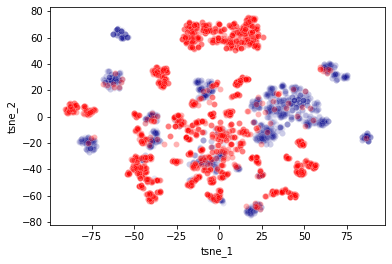

In [22]:
ax = sns.scatterplot(data=tsne_embedding.query("set == 'ext'"), x="tsne_1", y="tsne_2", color='darkblue', alpha=0.1)
ax = sns.scatterplot(data=tsne_embedding.query("set == 'train'"), x="tsne_1", y="tsne_2", color='red', alpha=0.3)

In [23]:
not_covered = tsne_embedding.query("tsne_1 < -50 and tsne_2 > 50")
not_covered = external_smiles[not_covered.index]

In [24]:
not_covered_sample = not_covered.sample(n=10, random_state=43)

In [25]:
mols = [Chem.MolFromSmiles(item) for item in not_covered_sample]

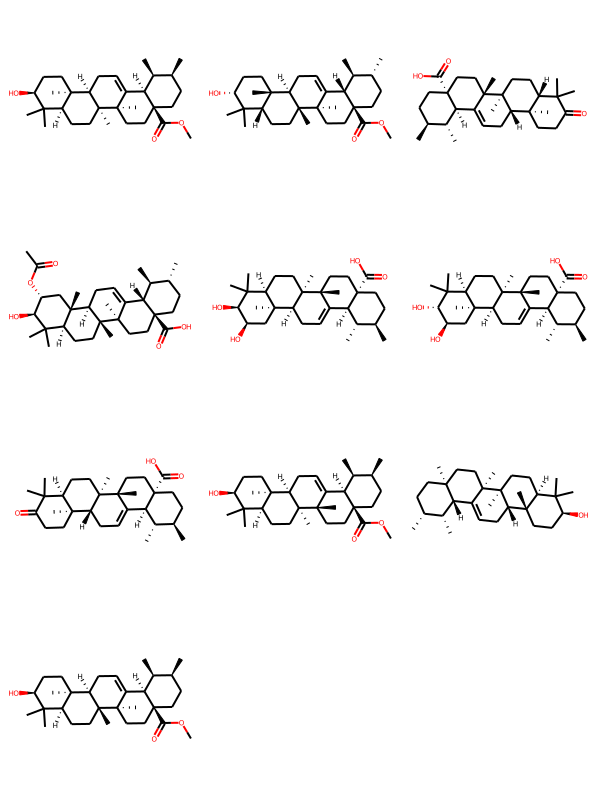

In [26]:
Draw.MolsToGridImage(mols)

In [25]:
y_train_val, y_train_val_pred, y_train, y_train_pred, y_cla = get_model_predictions(co.TRAINING_CONF_DIR/"median_100"/"xgboost_classification_Morgan_1024.json", smiles_codes_ext=external_smiles)
y_cla.name = "pred_cla"
y_cla.head()

2023-01-24 04:06:40,541 - logger - INFO - Optimal hyperparameters:, {'n_estimators': 207, 'max_depth': 11, 'min_child_weight': 4.0, 'eta': 0.0981512863074986, 'subsample': 0.8489134735056307, 'colsample_bytree': 0.9991597152608629, 'gamma': 0.09722750628904986, 'reg_alpha': 0.43598619904511926, 'reg_lambda': 0.9494079510404132, 'objective': 'reg:logistic'}
2023-01-24 04:06:40,542 - logger - INFO - CreateFPS fit...
2023-01-24 04:06:40,542 - logger - INFO - CreateFPS fit...
2023-01-24 04:06:40,542 - logger - INFO - CreateFPS transform...
2023-01-24 04:06:40,802 - logger - INFO - CreateFPS fit...
2023-01-24 04:06:40,803 - logger - INFO - CreateFPS transform...
2023-01-24 04:06:41,930 - logger - INFO - CreateFPS fit...
2023-01-24 04:06:41,931 - logger - INFO - CreateFPS transform...


ValueError: too many values to unpack (expected 5)

In [28]:
external_data

,query_id,target_id,score,file,smiles_from_target_id,query_id_chembl
178,2423,14273019,0.750000,JKBB.fpb,COc1cc(NC(=O)c2cc([N+](=O)[O-])ccc2Cl)ccc1NC(=O)c1ccccc1Cl,CHEMBL4784120
184,664,410046164,0.733333,JKAD.fpb,CCS(=O)(=O)c1ccc(CC(=O)Nc2ccccc2-c2ccc(-c3ccccc3)cc2)cc1,CHEMBL3609389
863,357,519399935,0.736842,JKAD.fpb,COCCc1ccc(Oc2ccc(NS(=O)(=O)c3ccc4c5c(cccc35)C(=O)N4)cc2)cc1,CHEMBL3234246
1132,299,476865727,0.719298,JKAD.fpb,CCS(=O)(=O)c1ccc(CC(=O)Nc2nc(Cc3ccccc3)c(-c3ccccc3)s2)cc1,CHEMBL3105804
1207,270,626626267,0.750000,JKAD.fpb,CC(=O)Nc1ccc(CC(=O)Nc2nc(-c3ccccc3)c(C(=O)c3ccccc3)s2)cc1,CHEMBL3105674
...,...,...,...,...,...,...
1026,2451,171747301,0.734694,FGBD.fpb,COC(=O)c1c(F)cccc1NC(=O)c1cc([N+](=O)[O-])ccc1Cl,CHEMBL4793754
1352,2406,58760667,0.775510,FGBD.fpb,CS(=O)(=O)Cc1ccccc1NC(=O)c1cc([N+](=O)[O-])ccc1Cl,CHEMBL4779012
1677,2423,7758317,0.725490,FGBD.fpb,COc1ccc(NC(C)=O)cc1NC(=O)c1cc([N+](=O)[O-])ccc1Cl,CHEMBL4784120
1702,2423,782683025,0.725490,FGBD.fpb,COC(=O)c1ccc(NC(=O)c2cc([N+](=O)[O-])ccc2Cl)c(OC)c1,CHEMBL4784120


In [29]:
def find_in_df(df, index):
    tmp = df.index == index
    return tmp.argmax()

In [30]:
# targets = ["438796", "140360", "205981195"]
targets = ["438796", "140360"]

# prawy
# targets = ["438796"]

In [31]:
target_coords = pd.DataFrame()
for target in targets:
    idx = external_data.query("target_id == @target").index[0]
    idx_in_df = find_in_df(external_data, idx)
    target_coords = pd.concat([target_coords, tsne_embedding.loc[[idx_in_df+n_start], :]], axis=0)
target_coords

,tsne_1,tsne_2,set
10499,34.854534,11.636230,ext
10229,19.026594,9.714859,ext


In [32]:
target = targets[0]
idx = external_data.query("target_id == @target").index[0]
find_in_df(external_data, idx)

499

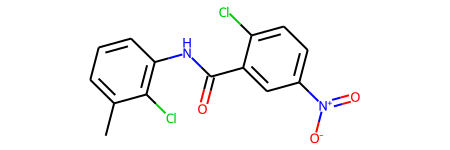

In [33]:
m1 = Chem.MolFromSmiles(external_data[external_data["target_id"]==targets[0]].iloc[[0], :]["smiles_from_target_id"].values[0])
m1

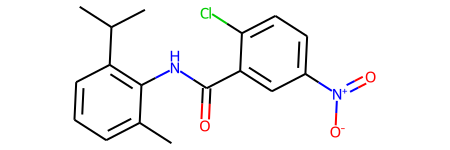

In [34]:
m2 = Chem.MolFromSmiles(external_data[external_data["target_id"]==targets[1]].iloc[[0], :]["smiles_from_target_id"].values[0])
m2

In [47]:
img = Draw.MolsToGridImage([m1, m2], molsPerRow=1, useSVG=True)
with open("chosen_species.svg", "w") as f:
    f.write(img.data)

In [35]:
external_data.iloc[[idx_in_df], :]

,query_id,target_id,score,file,smiles_from_target_id,query_id_chembl
57,2444,140360,0.804348,EJBA.fpb,Cc1cccc(C(C)C)c1NC(=O)c1cc([N+](=O)[O-])ccc1Cl,CHEMBL4791369


In [36]:
external_data_with_preds.query("target_id == @target")

,query_id,target_id,score,file,smiles_from_target_id,query_id_chembl,pred_cla,pred_reg,pred_reg_IC50
287,2442,438796,0.702128,EIBA.fpb,Cc1cccc(NC(=O)c2cc([N+](=O)[O-])ccc2Cl)c1Cl,CHEMBL4791019,0.934294,7.051166,888.861813
201,2462,438796,0.818182,EIBA.fpb,Cc1cccc(NC(=O)c2cc([N+](=O)[O-])ccc2Cl)c1Cl,CHEMBL4799590,0.934294,7.051166,888.861813
79,2444,438796,0.755556,EIBA.fpb,Cc1cccc(NC(=O)c2cc([N+](=O)[O-])ccc2Cl)c1Cl,CHEMBL4791369,0.934294,7.051166,888.861813


In [37]:
external_smiles[idx_in_df+n_start]
#external_smiles[10000]

'Cc1cccc(C(C)C)c1NC(=O)c1cc([N+](=O)[O-])ccc1Cl'

In [38]:
tsne_embedding.loc[[idx_in_df+n_start], :]

,tsne_1,tsne_2,set
10229,19.026594,9.714859,ext


In [39]:
circle1 = plt.Circle(xy=(9.5, -37), radius=2, color='yellow', fill=True)

In [40]:
for iii in range(target_coords[["tsne_1", "tsne_2"]].shape[0]):
    coords = tuple(target_coords[["tsne_1", "tsne_2"]].values[iii, :])
    print(coords)
    circle = plt.Circle(xy=coords, radius=2, color='yellow', fill=True)
    

(34.854534, 11.6362295)
(19.026594, 9.714859)


(34.854534, 11.6362295)
(19.026594, 9.714859)


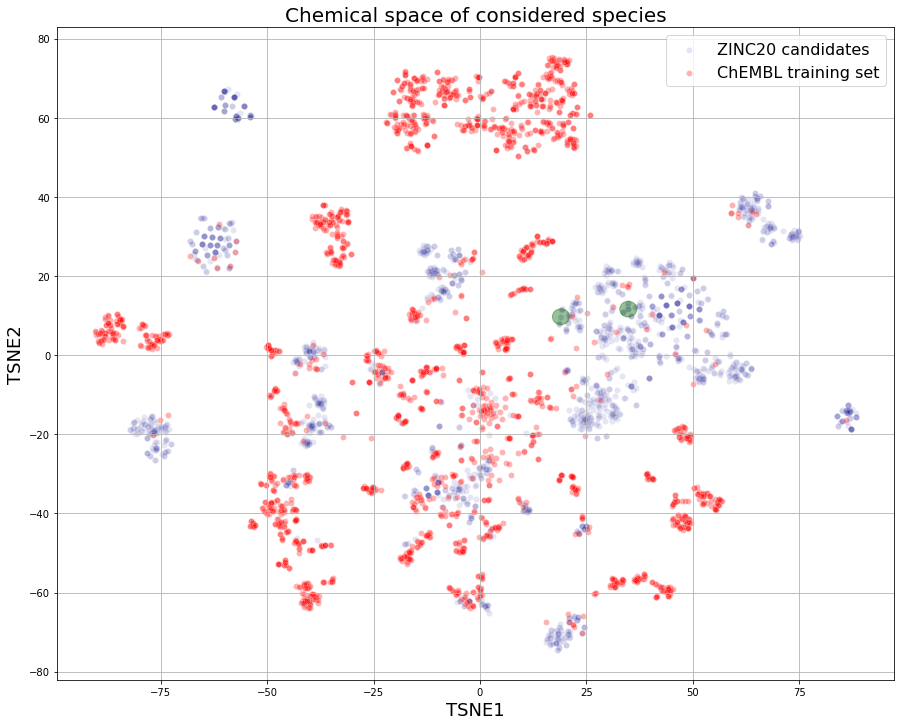

In [41]:
add_circles = True
plt.figure(figsize=(15,12))
ax = sns.scatterplot(data=tsne_embedding.query("set == 'ext'"), x="tsne_1", y="tsne_2", color='darkblue', alpha=0.1, label="ZINC20 candidates")
ax = sns.scatterplot(data=tsne_embedding.query("set == 'train'"), x="tsne_1", y="tsne_2", color='red', alpha=0.3, label="ChEMBL training set")
if add_circles:
    for iii in range(target_coords[["tsne_1", "tsne_2"]].shape[0]):
        coords = tuple(target_coords[["tsne_1", "tsne_2"]].values[iii, :])
        print(coords)
        circle = plt.Circle(xy=coords, radius=2, color='darkgreen', fill=True, alpha=0.4)
        ax.add_patch(circle)
plt.grid()
plt.title("Chemical space of considered species", fontsize=20)
plt.xlabel("TSNE1", fontsize=18)
plt.ylabel("TSNE2", fontsize=18)
plt.legend(fontsize=16)


In [130]:
external_data_with_preds.query("target_id in @targets")

,query_id,target_id,score,file,smiles_from_target_id,query_id_chembl,pred_cla,pred_reg,pred_reg_IC50
57,2444,140360,0.804348,EJBA.fpb,Cc1cccc(C(C)C)c1NC(=O)c1cc([N+](=O)[O-])ccc1Cl,CHEMBL4791369,0.954616,7.035055,922.455658
287,2442,438796,0.702128,EIBA.fpb,Cc1cccc(NC(=O)c2cc([N+](=O)[O-])ccc2Cl)c1Cl,CHEMBL4791019,0.934294,7.051166,888.861813
201,2462,438796,0.818182,EIBA.fpb,Cc1cccc(NC(=O)c2cc([N+](=O)[O-])ccc2Cl)c1Cl,CHEMBL4799590,0.934294,7.051166,888.861813
79,2444,438796,0.755556,EIBA.fpb,Cc1cccc(NC(=O)c2cc([N+](=O)[O-])ccc2Cl)c1Cl,CHEMBL4791369,0.934294,7.051166,888.861813
1187,435,205981195,0.753846,JKAA.fpb,Cc1ccc([C@H](NC(=O)Cc2ccc(OCc3c(C)noc3C)cc2)c2ccccc2)c(C)c1,CHEMBL3314025,0.913598,8.435542,36.682449


In [142]:
selected_smiles = external_data_with_preds.query("target_id in @targets")["smiles_from_target_id"].unique().tolist()
selected_smiles = [Chem.MolFromSmiles(item) for item in selected_smiles]

In [141]:
most_similar = ["Cc1cccc(C)c1NC(=O)c1cc([N+](=O)[O-])ccc1Cl", "Cc1ccccc1NC(=O)c1cc([N+](=O)[O-])ccc1Cl", "Cc1cc(Cl)ccc1C(NC(=O)Cc1ccc(OCc2c(C)noc2C)cc1)c1ccc(Cl)cc1"]
most_similar = [Chem.MolFromSmiles(item) for item in most_similar]

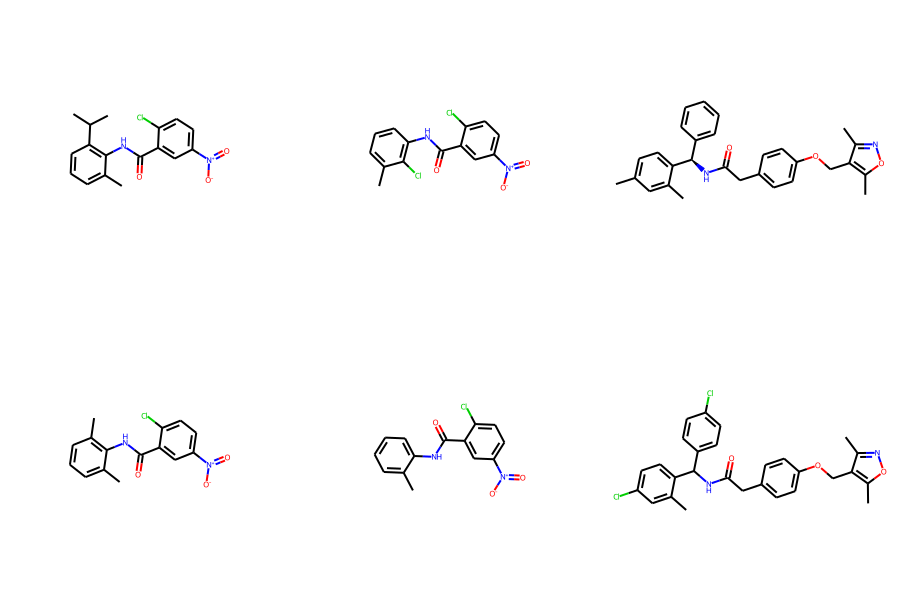

In [144]:
Draw.MolsToGridImage(selected_smiles+most_similar, subImgSize=(300, 300), molsPerRow=3)